In [2]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
boston = load_boston() 

In [4]:
X = boston.data
Y = boston.target

In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
## Normalize

u = np.mean(X, axis = 0)
std = np.std(X, axis = 0)
print(u.shape, std.shape)

(13,) (13,)


In [8]:
X = (X-u)/std

In [9]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


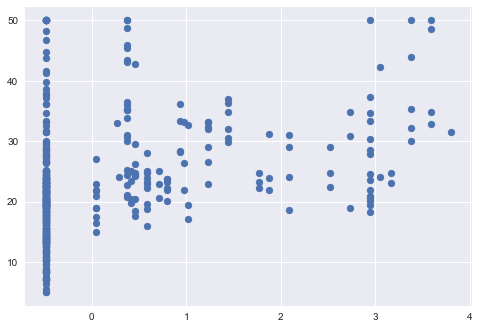

In [10]:
plt.style.use("seaborn")
plt.scatter(X[:, 1], Y)
plt.show()

In [11]:
X.shape, Y.shape

((506, 13), (506,))

In [12]:
ones = np.ones((X.shape[0], 1))

In [13]:
X = np.hstack((ones, X))

In [14]:
X.shape

(506, 14)

In [15]:
y = Y

In [16]:
temp = np.zeros((X.shape[1]))
temp.T.shape

(14,)

In [17]:
y.shape


(506,)

In [18]:
def hypothesis(X, theta):
  return np.dot(X, theta)

def gradient(X, y, theta):
  y_ = hypothesis(X, theta)
  grad = np.dot(X.T, (y_ - y))
  return grad/X.shape[0]

def error(X, y, theta):
  e = 0.0
  y_ = hypothesis(X, theta)
  e = np.sum((y_ - y)**2)
  return e/X.shape[0]

def gradientDescent(X, y, learning_rate = 0.1, max_steps = 50):
  error_list = []
  theta = np.zeros((X.shape[1],))

  for i in range(max_steps):
    grad = gradient(X, y, theta)
    error_list.append(error(X, y, theta))
    theta = theta -  learning_rate * grad 

  return theta, error_list 

In [19]:
theta, error_list = gradientDescent(X, y)

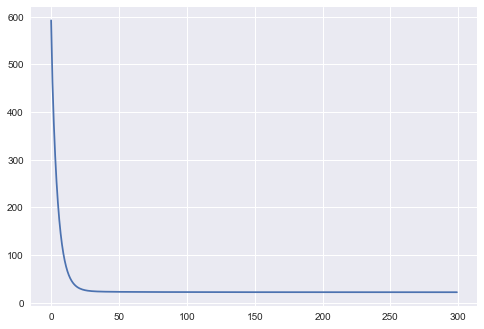

In [20]:
plt.plot(error_list)

In [21]:
y_ = hypothesis(X, theta)

In [22]:
def accuracy(y, y_):
  num = np.sum((y - y_)**2)
  den = np.sum((y - Y.mean())**2)

  return 1 - (num/den)

In [23]:
accuracy(y, y_)

0.7404541323942743